## Observations and Insights 

Analysis: Ramicane is the most effective drug treatment compared to the other treatments with the lowest average and median, indicating less tumor growth when this treatment is used. 

In [419]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="outer", on = ["Mouse ID"])

# Display the data table for preview

mouse_data_complete.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [420]:
# Checking the number of mice.
number_of_mice = len(mouse_data_complete["Mouse ID"].unique())

number_of_mice



249

In [421]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_ID = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mice_ID



array(['g989'], dtype=object)

In [422]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df = mouse_data_complete.loc[mouse_data_complete["Mouse ID"]=="g989"]

mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [423]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_clean = mouse_data_complete[mouse_data_complete["Mouse ID"].isin(duplicate_mice_ID)==False]

mouse_clean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [424]:
# Checking the number of mice in the clean DataFrame.

len(mouse_clean["Mouse ID"].unique())


248

## Summary Statistics

In [425]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_mean = mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_regimen_med = mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_regimen_var = mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_regimen_std = mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_regimen_sem = mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

drug_regimen_df = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean, 
                                "Median Tumor Volume": drug_regimen_med, 
                                "Tumor Volume Variance": drug_regimen_var, 
                                "Tumor Volume Std. Dev.": drug_regimen_std, 
                                "Tumor Volume Std. Err.": drug_regimen_sem})

drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [426]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_group = mouse_clean.groupby("Drug Regimen")

drug_regimen_df_2 = drug_regimen_group.agg(["mean", "median", "var", "std"])["Tumor Volume (mm3)"]

drug_regimen_df_2



,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

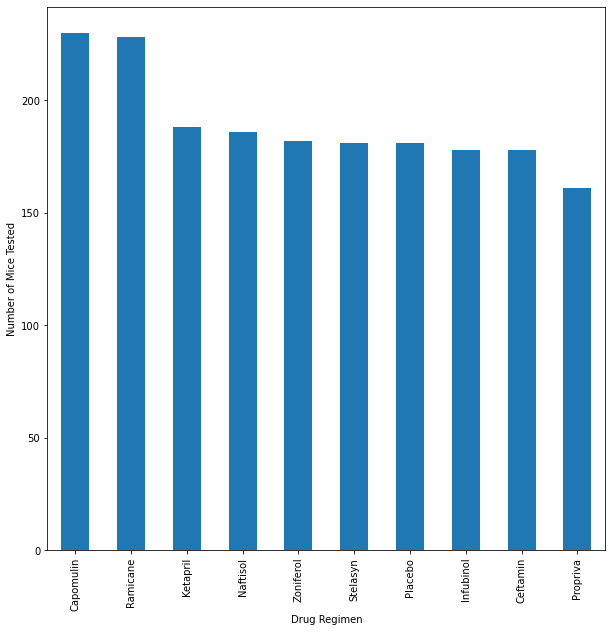

<Figure size 432x288 with 0 Axes>

In [427]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_of_mouse = mouse_data_complete["Drug Regimen"].value_counts()
#regimen_and_timepoint = mouse_data_complete.groupby("Drug Regimen")["Mouse ID"].count() this also works but its in the wrong order

# Use df to create Bar plot
count_of_mouse.plot(kind="bar", figsize=(10,10))

# Getting x and y labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()



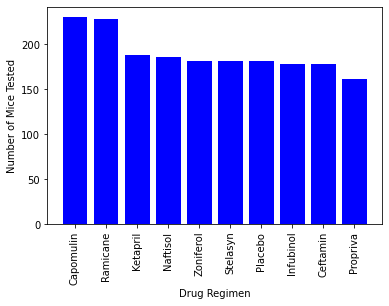

In [428]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_y_series = mouse_data_complete["Drug Regimen"].value_counts()
#y_series is basically the x_series

# Plotting the actual graph 
plt.bar(x_y_series.index.values, x_y_series.values, color = "blue", align = "center")
plt.xticks(rotation = 90)

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


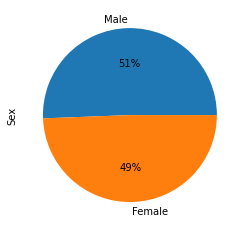

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [429]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = mouse_data_complete["Sex"].value_counts()

# Use df to create Bar plot
mouse_gender.plot(kind="pie", autopct="%1.0f%%")

plt.show()
plt.tight_layout

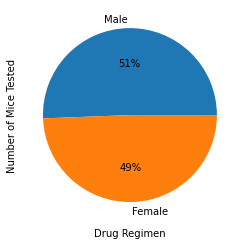

<Figure size 432x288 with 0 Axes>

In [430]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_y_series = mouse_data_complete["Sex"].value_counts()
#y_series is basically the x_series

# Plotting the actual graph 
plt.pie(x_y_series.values, labels = x_y_series.index.values, autopct="%1.0f%%")

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [431]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timept = mouse_clean.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_tumor_df = pd.merge(greatest_timept, mouse_clean, on = ["Mouse ID", "Timepoint"], how="left")
merge_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [432]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = merge_tumor_df.loc[merge_tumor_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(final_tumor)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    

Text(0, 0.5, 'Final Tumor Volume (mm3)')

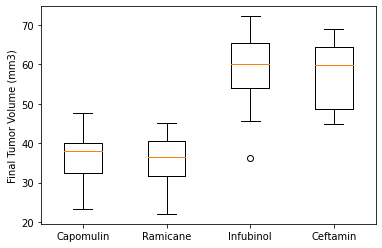

In [433]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=drug_list)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

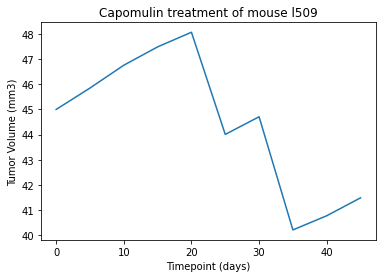

In [434]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"] == "l509"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

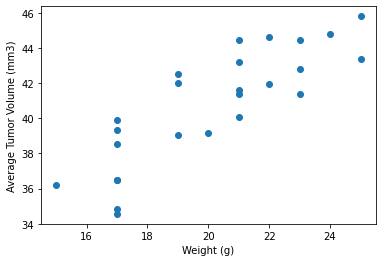

In [435]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin.groupby("Mouse ID").mean()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


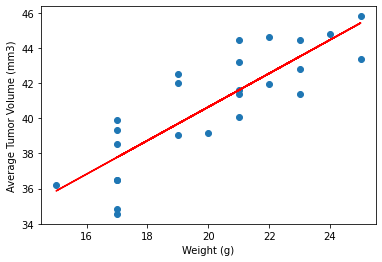

In [436]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# for the slope (y=mx+b)
slope_line = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
y = capomulin_avg["Weight (g)"]*slope_line[0] + slope_line[1]
plt.plot(capomulin_avg["Weight (g)"], y, color="red")

